In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../Student_Performance.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


## Visualization of In-dependent with dependent variable

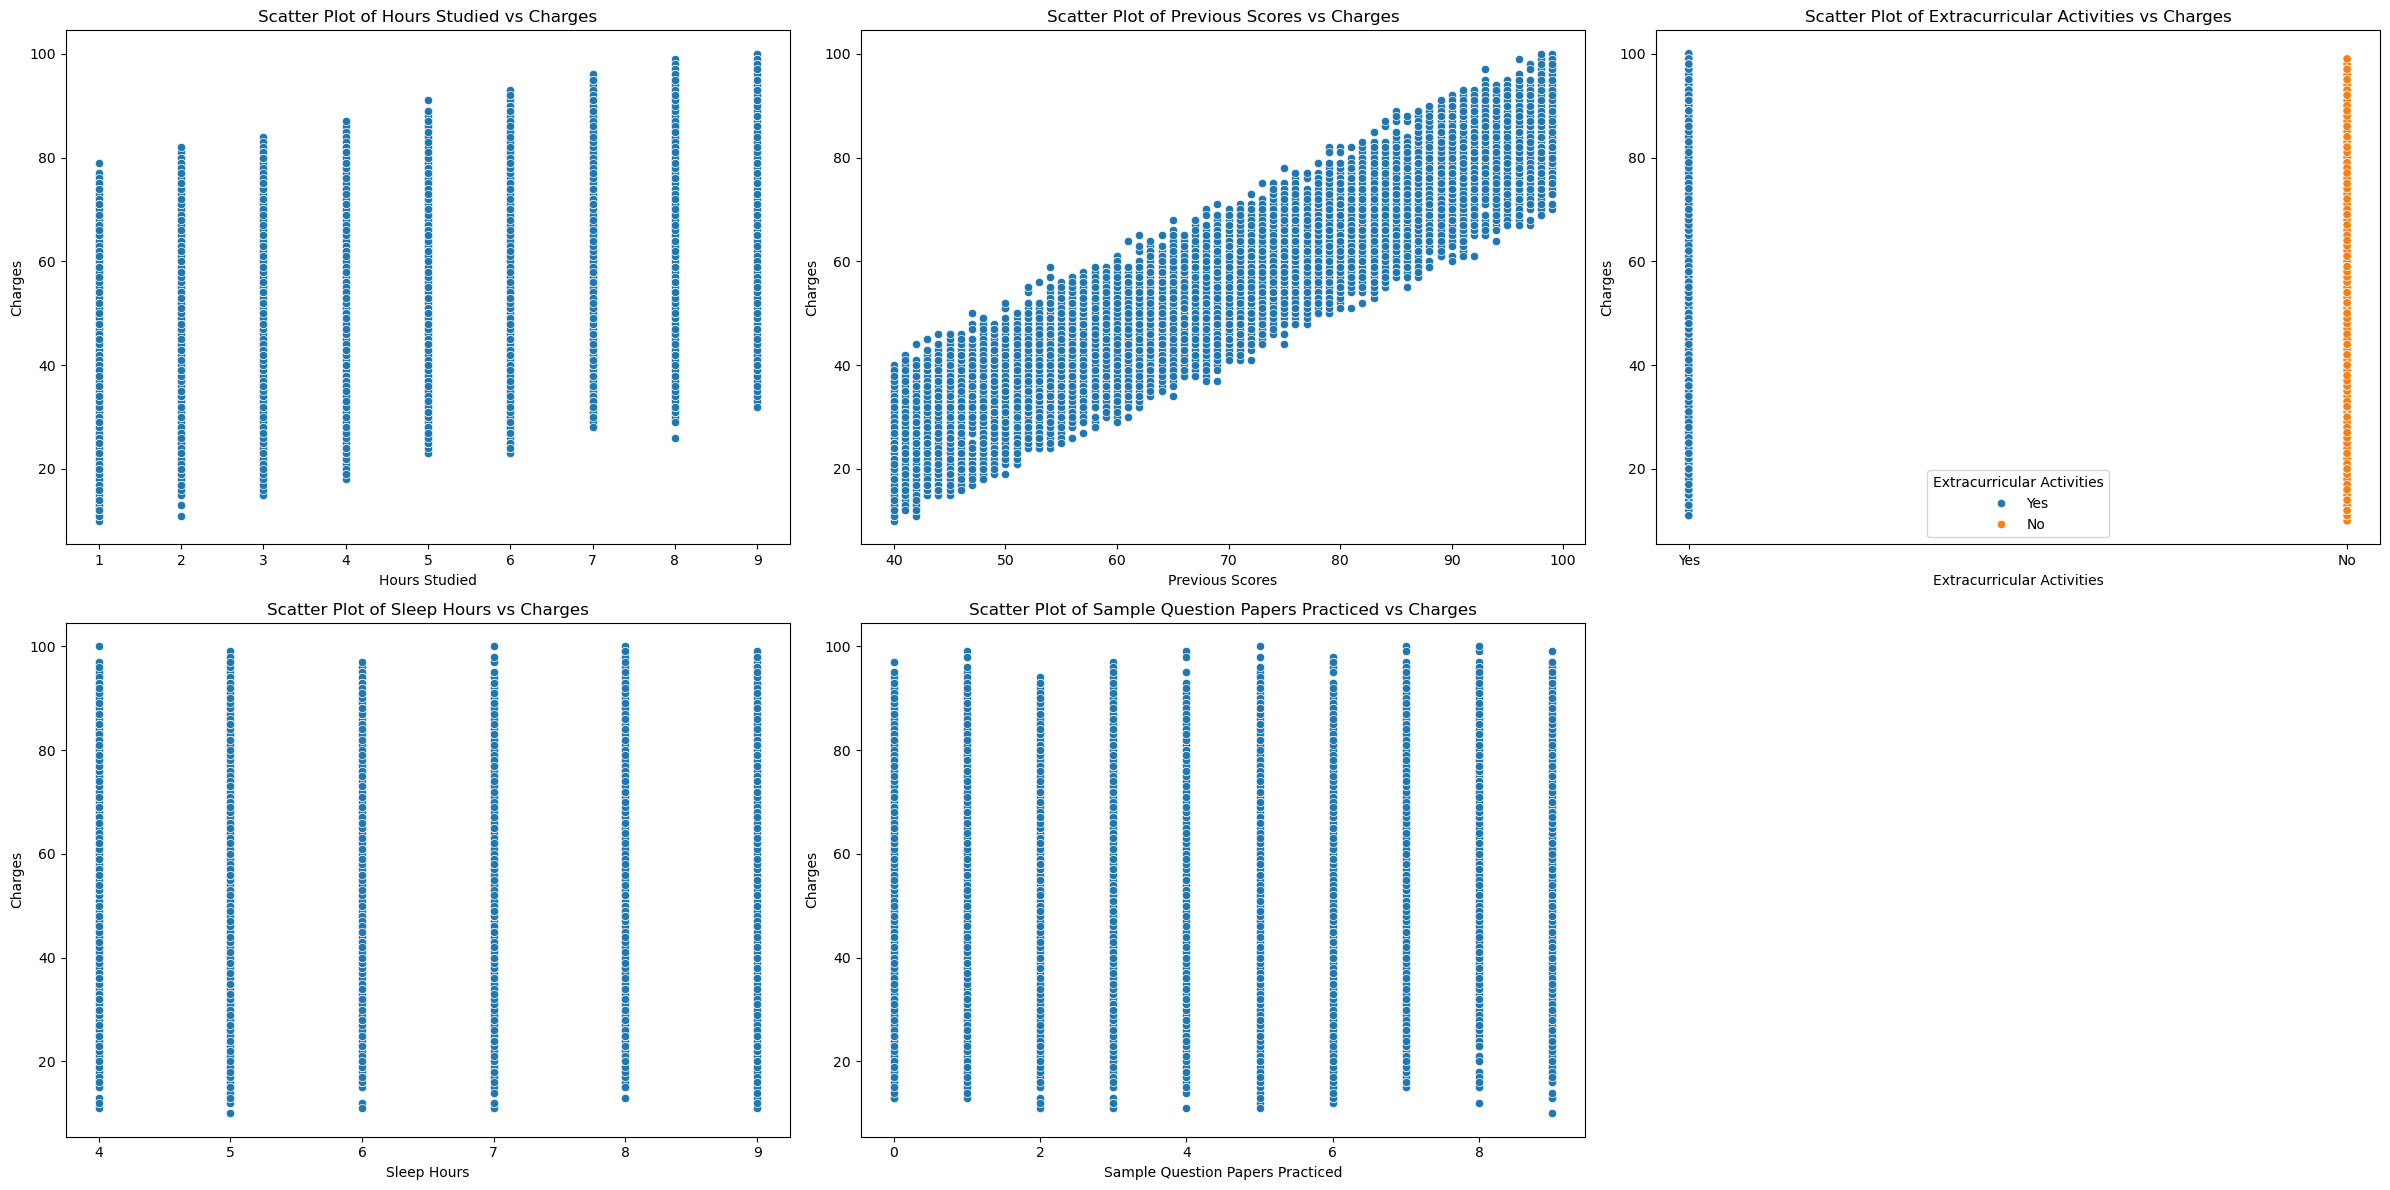

In [3]:
# for var in X.columns.tolist():
#     plt.figure(figsize=(8, 6))
#     if X[var].dtype == 'object':  # Check if the variable is categorical
#         sns.scatterplot(x=var, y=Y, data=df, hue=var)
#     else:
#         sns.scatterplot(x=X[var], y=Y)
#     plt.title(f'Scatter Plot of {var} vs Charges')
#     plt.xlabel(var)
#     plt.ylabel('Charges')
#     plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of columns and rows
num_cols = 3
num_plots = len(X.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # This ensures enough rows

# Adjust the figsize to maintain the 8x6 size for each subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, var in enumerate(X.columns):
    ax = axes[i]
    if X[var].dtype == 'object':  # Check if the variable is categorical
        sns.scatterplot(x=var, y=Y, data=df, hue=var, ax=ax)
    else:
        sns.scatterplot(x=X[var], y=Y, ax=ax)
    ax.set_title(f'Scatter Plot of {var} vs Charges')
    ax.set_xlabel(var)
    ax.set_ylabel('Charges')

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 2] = label_encoder.fit_transform(X.iloc[:, 2])
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize Neural Network
regressor = Sequential()

# Input layer
regressor.add(Dense(units=3, kernel_initializer='uniform', activation='relu', input_dim=5))

# Output layer (regression)
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile ANN
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train ANN
regressor.fit(X_train, Y_train, batch_size=10, epochs=100)

2024-08-01 15:02:26.792223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2024-08-01 15:02:29.492212: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


800/800 [==============================] - 4s 4ms/step - loss: 3162.9656 - mse: 3162.9653
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 2084.8213 - mse: 2084.8213
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 960.1545 - mse: 960.1545
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 345.6976 - mse: 345.6976
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 95.3662 - mse: 95.3662
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 13.5982 - mse: 13.5982
Epoch 7/100
800/800 [==============================] - 4s 4ms/step - loss: 4.5665 - mse: 4.5665
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 4.3604 - mse: 4.3604
Epoch 9/100
800/800 [==============================] - 3s 4ms/step - loss: 4.3395 - mse: 4.3395
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 4.3155 - mse: 4.3155
Epoch 11/100
800/800 [=====

In [1]:
# Predicting the test set results
Y_pred = regressor.predict(X_test)

NameError: name 'regressor' is not defined

# Accuracy Check

In [11]:

# Evaluating the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute R-Squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-Squared (R2) score:", r2)

Mean Squared Error (MSE): 4.121518834069002
Mean Absolute Error (MAE): 1.6249621629714965
R-Squared (R2) score: 0.9880224059436418
